## 1D Convolutional Neural Network Sentiment Analysis on IMDB Movie Reviews

#### 1D Convolutional Neural Network with a customized embedding layer on the imdb movie reviews data set is implemented to do the sentiment analysis

### Import Keras layers, etc.

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import Flatten
from keras.layers import SpatialDropout1D, Conv1D, LSTM, GlobalMaxPooling1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

Using TensorFlow backend.


### Load IMDB data sets, padding

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [4]:
# truncate and pad input sequences
max_review_length = 400
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

### One CNN layer Model

In [5]:
# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(input_dim=5001, output_dim=64, input_length=400))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           320064    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

In [6]:
epochs=5
batch_size=64
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,     
              validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 274s 11ms/step - loss: 0.1419 - acc: 0.7874 - val_loss: 0.0923 - val_acc: 0.8726
Epoch 2/5
25000/25000 [==============================] - 283s 11ms/step - loss: 0.0795 - acc: 0.8920 - val_loss: 0.0857 - val_acc: 0.8802
Epoch 3/5
25000/25000 [==============================] - 276s 11ms/step - loss: 0.0609 - acc: 0.9210 - val_loss: 0.0808 - val_acc: 0.8897
Epoch 4/5
25000/25000 [==============================] - 267s 11ms/step - loss: 0.0471 - acc: 0.9382 - val_loss: 0.0813 - val_acc: 0.8918
Epoch 5/5
25000/25000 [==============================] - 271s 11ms/step - loss: 0.0385 - acc: 0.9512 - val_loss: 0.0803 - val_acc: 0.8955


In [7]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.55%


In [8]:
y_hat = model.predict_proba(X_test)

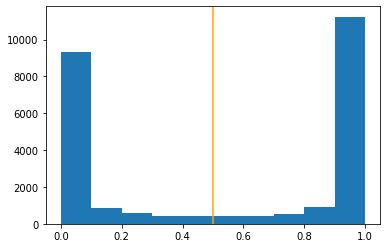

In [9]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [11]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'96.33'

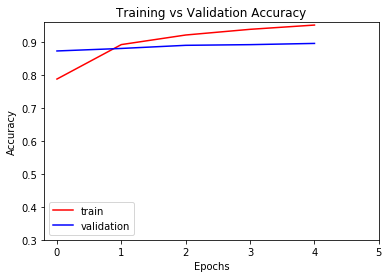

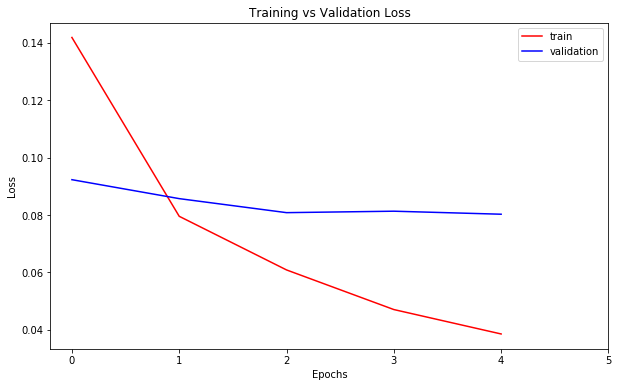

In [12]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

### Three CNN Layers Model

In [13]:
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(input_dim=5001, output_dim=64, input_length=400))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 400, 64)           320064    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 398, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 64)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 199, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 197, 128)          24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 128)           0         
__________

In [14]:
epochs=5
batch_size=64
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,     
              validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 285s 11ms/step - loss: 0.1789 - acc: 0.7028 - val_loss: 0.1358 - val_acc: 0.8039
Epoch 2/5
25000/25000 [==============================] - 282s 11ms/step - loss: 0.1047 - acc: 0.8546 - val_loss: 0.0995 - val_acc: 0.8627
Epoch 3/5
25000/25000 [==============================] - 281s 11ms/step - loss: 0.0863 - acc: 0.8824 - val_loss: 0.1012 - val_acc: 0.8550
Epoch 4/5
25000/25000 [==============================] - 269s 11ms/step - loss: 0.0726 - acc: 0.9049 - val_loss: 0.0894 - val_acc: 0.8789
Epoch 5/5
25000/25000 [==============================] - 286s 11ms/step - loss: 0.0649 - acc: 0.9134 - val_loss: 0.0907 - val_acc: 0.8767


In [15]:
y_hat = model.predict_proba(X_test)

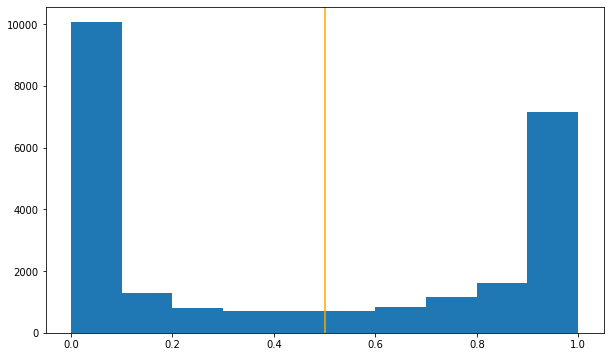

In [16]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [17]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'95.25'

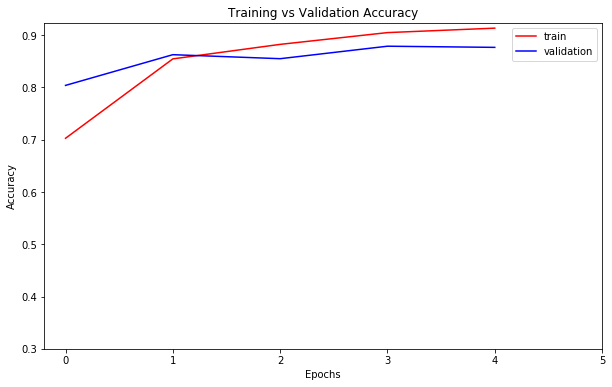

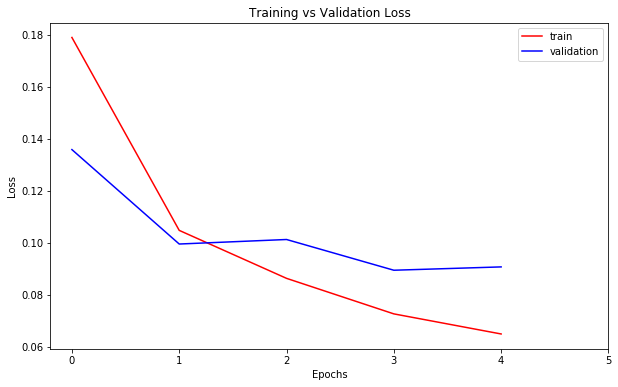

In [18]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

### One CNN Layer + Regularization

In [31]:
# create the model
embedding_vecor_length = 64
model = Sequential()
model.add(Embedding(input_dim=5001, output_dim=64, input_length=400))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 400, 64)           320064    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total para

In [32]:
epochs=5
batch_size=64
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,     
              validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 281s 11ms/step - loss: 0.3336 - acc: 0.7450 - val_loss: 0.1270 - val_acc: 0.8428
Epoch 2/5
25000/25000 [==============================] - 266s 11ms/step - loss: 0.1145 - acc: 0.8618 - val_loss: 0.1093 - val_acc: 0.8663
Epoch 3/5
25000/25000 [==============================] - 265s 11ms/step - loss: 0.0944 - acc: 0.8876 - val_loss: 0.1046 - val_acc: 0.8710
Epoch 4/5
25000/25000 [==============================] - 269s 11ms/step - loss: 0.0825 - acc: 0.9053 - val_loss: 0.1012 - val_acc: 0.8756
Epoch 5/5
25000/25000 [==============================] - 273s 11ms/step - loss: 0.0729 - acc: 0.9173 - val_loss: 0.0952 - val_acc: 0.8809


In [33]:
y_hat = model.predict_proba(X_test)

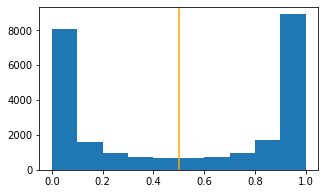

In [34]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [35]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'95.15'

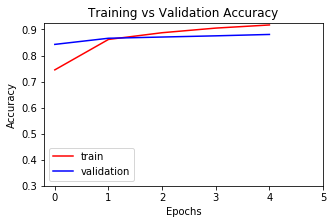

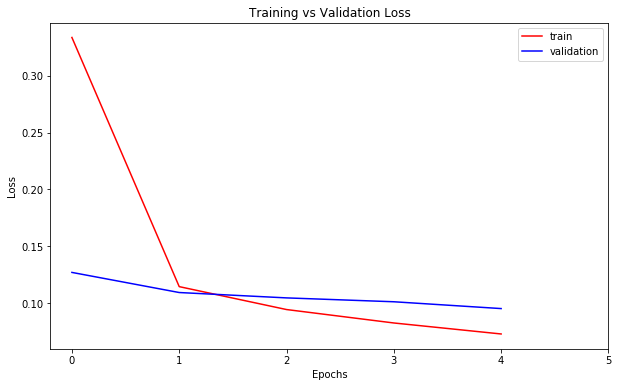

In [36]:
plt.plot(history.history['acc'], color='red')
plt.plot(history.history['val_acc'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.yticks(np.arange(0.3, 1, 0.1))
plt.rcParams['figure.figsize'] = (10, 6)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.xticks(np.arange(0, epochs + 1))
plt.rcParams['figure.figsize'] = (5, 3)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend(['train','validation'])
plt.show()